In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [92]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

#### Split Data

In [93]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date'], inplace=True, axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Drop columns which do not improve the model

In [94]:
df.drop(['Location'], axis=1, inplace=True)

## Missing Values


#### Mean imputation in NA values

In [95]:
df.drop(['Evaporation'], axis=1, inplace=True)
df.drop(['Sunshine'], axis=1, inplace=True)
df.drop(['Cloud9am'], axis=1, inplace=True)
df.drop(['Cloud3pm'], axis=1, inplace=True)

In [96]:
mintemp_mean=df['MinTemp'].mean() 
df['MinTemp'].fillna(mintemp_mean, inplace=True)

mintemp_mean=df['MinTemp'].mean() 
df['MinTemp'].fillna(mintemp_mean, inplace=True)

maxtemp_mean=df['MaxTemp'].mean() 
df['MaxTemp'].fillna(maxtemp_mean, inplace=True)

rainfall_mean=df['Rainfall'].mean() 
df['Rainfall'].fillna(rainfall_mean, inplace=True)

windgustspeed_mean=df['WindGustSpeed'].mean() 
df['WindGustSpeed'].fillna(windgustspeed_mean, inplace=True)

windspeed9am_mean=df['WindSpeed9am'].mean() 
df['WindSpeed9am'].fillna(windspeed9am_mean, inplace=True)

windspeed3pm_mean=df['WindSpeed3pm'].mean() 
df['WindSpeed3pm'].fillna(windspeed3pm_mean, inplace=True)

humidity9am_mean=df['Humidity9am'].mean() 
df['Humidity9am'].fillna(humidity9am_mean, inplace=True)

humidity3pm_mean=df['Humidity3pm'].mean() 
df['Humidity3pm'].fillna(humidity3pm_mean, inplace=True)

pressure9am_mean=df['Pressure9am'].mean() 
df['Pressure9am'].fillna(pressure9am_mean, inplace=True)

pressure3pm_mean=df['Pressure3pm'].mean() 
df['Pressure3pm'].fillna(pressure3pm_mean, inplace=True)

temp9am_mean=df['Temp9am'].mean() 
df['Temp9am'].fillna(temp9am_mean, inplace=True)

temp3pm_mean=df['Temp3pm'].mean() 
df['Temp3pm'].fillna(temp3pm_mean, inplace=True)
 

In [97]:
df.dropna(inplace=True)

print(df.isna().sum())

df.shape

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


(123710, 20)

## Label encoding

In [98]:
label_encoder = LabelEncoder()

df['EncodedWindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df.drop('WindGustDir', axis = 1, inplace=True)

df['EncodedWindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df.drop('WindDir9am', axis = 1, inplace=True)

df['EncodedWindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df.drop('WindDir3pm', axis = 1, inplace=True)

df['EncodedRainToday'] = label_encoder.fit_transform(df['RainToday'])
df.drop('RainToday', axis = 1, inplace=True)

df['EncodedRainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df.drop('RainTomorrow', axis = 1, inplace=True)


## Under sampling

In [99]:
# Separate features and labels
X = df.drop('EncodedRainTomorrow', axis=1)
y = df['EncodedRainTomorrow']

undersampler = RandomUnderSampler(random_state=2023)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['EncodedRainTomorrow'] = y_resampled

In [100]:
df_resampled.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,EncodedWindGustDir,EncodedWindDir9am,EncodedWindDir3pm,EncodedRainToday,EncodedRainTomorrow
34758,10.0,18.7,0.0,59.0,24.0,35.0,43.0,43.0,1006.10000,1007.800000,16.9,16.0,2012,6,22,7,3,7,0,0
62627,8.7,23.4,0.0,35.0,9.0,19.0,86.0,51.0,1018.80000,1016.800000,13.4,22.7,2013,3,15,2,14,9,0,0
22370,16.1,19.2,1.4,65.0,24.0,28.0,73.0,62.0,1014.80000,1014.300000,17.6,18.3,2012,7,5,14,13,15,1,0
123833,15.8,32.0,0.0,54.0,15.0,30.0,60.0,37.0,1017.64994,1015.255889,23.5,30.4,2009,1,3,11,11,11,0,0
57901,3.7,17.8,0.0,33.0,13.0,9.0,67.0,36.0,1019.10000,1017.600000,10.6,17.0,2016,10,28,9,9,9,0,0


In [101]:
df_resampled.to_csv('../../../datasets/parte1/dataset_cleaned.csv', index=False)


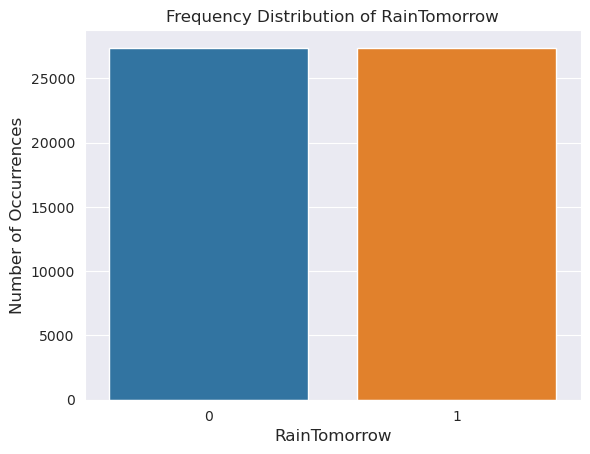

In [102]:
raintomorrow_count = df_resampled['EncodedRainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values)
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()